# Confined compression of a cube

Mass and energy balances below are taken from the paper in review: "Non-isothermal two-phase flow in deformable porous media: Systematic open-source implementation and verification procedure"

Consider a gasous cube which is compressed by 10% from its top surface.
All boundaries are closed, therefore there are no fluxes nor flows of any phase, so $\mathbf{A}=0$ and $\mathbf{J}=0$. 
Biot coefficient is $\alpha_B=1$, thus $\beta_{p,\text{SR}}=0$, and $\phi=\phi_\text{G}=1$.
With $s_\text{G}=1$, $s_\text{L}=0$  and $\left(s_\text{L}\right)'_\text{S}=0$, the mass balance equation (eq. 40 in the paper) simplifies to
$$
0=\rho_\text{GR}\text{div}\left(\mathbf{u}_\text{S}\right)'_\text{S}+\left(\rho_\text{GR}\right)'_\text{S}.
$$
With volume strain $e=\text{div}\left(\mathbf{u}_\text{S}\right)'_\text{S}$ we write
$$
\frac{1}{\rho_\text{GR}}\left(\rho_\text{GR}\right)'_\text{S}=-e,
$$
which can be integrated
$$
\int^{\rho_\text{GR}}_{\rho_{\text{GR},0}}\frac{1}{\rho_\text{GR}}\text{d}\,\rho_\text{GR}=-e
$$
so that we find 
$$
\ln\left(\rho_\text{GR}\right) - \ln\left(\rho_{\text{GR},0}\right) = -e
$$
or 
$$
\rho_\text{GR}=\rho_{\text{GR},0}\exp\left(-e\right).
$$

The evolution of gas pressure can be found from energy balance equation (eq. 50 in the paper):
Starting from
$$
\left(\Sigma_\alpha\rho_\alpha u_\alpha\right)'_\text{S}
+\left(\Sigma_\alpha\rho_\alpha h_\alpha\right)\text{div}\left(\mathbf{u}_\text{S}\right)'_\text{S}
=0,
$$
with $u_\text{S}=h_\text{S}$ and $u_\text{G}=h_\text{G}-\frac{p_\text{GR}}{\rho_\text{GR}}$ and with $h_\alpha=c_{p,\alpha}T$. Considering that $\phi_\alpha=\text{const}$ and $c_{p,\text{S}}=0$, we find
$$
\left(\rho_\text{GR}\right)'_\text{S}\left(c_{p,\text{G}}T-p_\text{GR}\rho_\text{GR}^{-1}\right)
+
\rho_\text{GR}\left(c_{p,\text{G}}T-p_\text{GR}\rho_\text{GR}^{-1}\right)'_\text{S}
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
Assuming ideal gas behaviour, we can write $\frac{p_\text{GR}}{\rho_\text{GR}}=\frac{M}{RT}$ and find
$$
\left(\rho_\text{GR}\right)'_\text{S}c_{v,\text{G}}T
+
\rho_\text{GR}\left(c_{v,\text{G}}T\right)'_\text{S}
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
With $c_{v,\text{G}}=\text{const}$ it follows
$$
\frac{\rho_\text{GR}}{p_\text{GR}}\left(p_\text{GR}\right)'_\text{S}c_{v,\text{G}}T
+
\rho_\text{GR}c_{p,\text{G}}Te=0.
$$
Density and temperature cancel out so the final equation can be written as 
$$
\frac{1}{p_\text{GR}}\left(p_\text{GR}\right)'_\text{S}
=-\kappa e
$$
with the adiabatic index $\kappa = \frac{c_v}{c_p}$. The equation can be integrated to find the solution for the pressure evolution
$$
p_\text{GR}=p_{\text{GR},0}\exp\left(-\kappa e\right)
$$

The temperature evolution follows _Poissons_ equations for isentropic processes
$$
T=T_0\left(\frac{p_\text{GR}}{p_{\text{GR},0}}\right)^{\frac{\kappa-1}{\kappa}}.
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:

# time runs from 0 to 10 in 11 steps
t = np.linspace(0, 10, 11)

# volume strain is a function of time
e = -t/100

# initial state
p_0 = 1e6
T_0 = 270
R = 8.3144621
M = 0.01
c_p = 1000

c_v = c_p-R/M
rho_0 = p_0*M/R/T_0
kappa=c_p/c_v

# density, pressure and temperature fields
rho_GR = rho_0*np.exp(-e)
p_GR=p_0*np.exp(-kappa*e)
T = p_GR*M/R/rho_GR


In [21]:
from ogs6py.ogs import OGS
import vtuIO

In [22]:
cube_compression=OGS(PROJECT_FILE="compression_gas.prj")

In [23]:
PATH_OGS="/home/norbert/OGS/build_release/bin"
cube_compression.run_model(path=PATH_OGS)

OGS finished with project file compression_gas.prj.
Execution took 0.46060657501220703 s


In [24]:
pvdfile = vtuIO.PVDIO("result_compression_gas.pvd", dim=2)

result_compression_gas.pvd


In [25]:
time = pvdfile.timesteps

In [26]:
point={'pt0': (0.0,1.0,0.0)}

In [27]:
# read pressure, temperature and density from pvd result file
pressure = pvdfile.read_time_series("gas_pressure_interpolated", point)
temperature = pvdfile.read_time_series("temperature_interpolated", point)
density = pvdfile.read_time_series("gas_density", point)

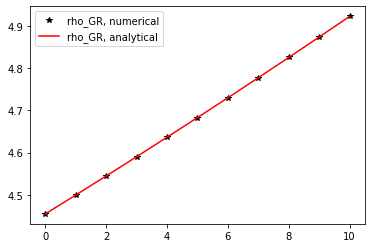

In [28]:
p_GR_num=pressure['pt0']
T_num=temperature['pt0']
rho_GR_num=density['pt0']

plt.plot(time,rho_GR_num, 'k*',  label='rho_GR, numerical')
plt.plot(t,rho_GR,'r-', label='rho_GR, analytical')

plt.legend()
plt.show()


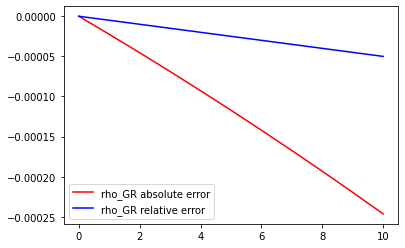

In [29]:
err_rho_abs = rho_GR - rho_GR_num
err_rho_rel = err_rho_abs / rho_GR
plt.plot(t,err_rho_abs,'r-', label='rho_GR absolute error')
plt.plot(t,err_rho_rel,'b-', label='rho_GR relative error')

plt.legend()
plt.show()

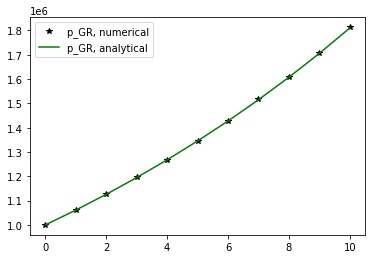

In [30]:

plt.plot(time,p_GR_num, 'k*',  label='p_GR, numerical')
plt.plot(t,p_GR,'g-', label='p_GR, analytical')

plt.legend()
plt.show()


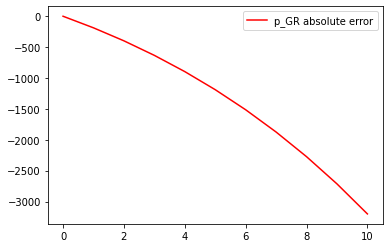

In [31]:
err_p_abs = p_GR - p_GR_num
plt.plot(t,err_p_abs,'r-', label='p_GR absolute error')

plt.legend()
plt.show()

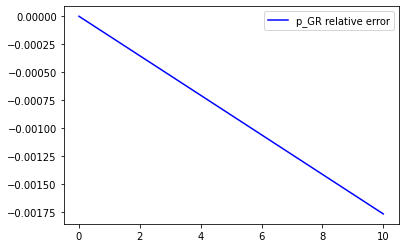

In [32]:
err_p_rel = err_p_abs / p_GR
plt.plot(t,err_p_rel,'b-', label='p_GR relative error')

plt.legend()
plt.show()

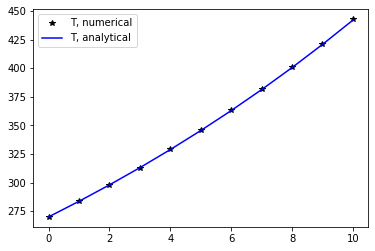

In [33]:

plt.plot(time,T_num, 'k*',  label='T, numerical')
plt.plot(t,T,'b-', label='T, analytical')

plt.legend()
plt.show()


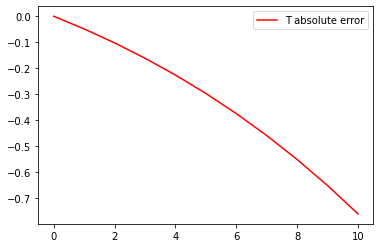

In [34]:
err_T_abs = T - T_num
plt.plot(t,err_T_abs,'r-', label='T absolute error')
plt.legend()
plt.show()

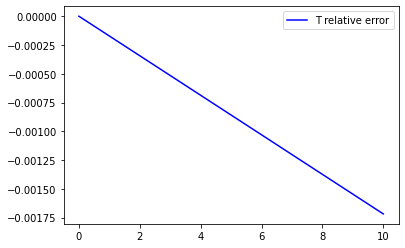

In [35]:
err_T_rel = err_T_abs / T

plt.plot(t,err_T_rel,'b-', label='T relative error')
plt.legend()
plt.show()